<a href="https://colab.research.google.com/github/MaewTeam/basicPython_ImageProcessing/blob/master/face_compare_recognition_AIY_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Face Comparison Demo

Adopt and modify from
[github](https://github.com/krasserm/face-recognition)

In [0]:
# install google drive tool python
!pip install -U -q PyDrive

### Mounting data for this notebook to /gdrive
This may need google account authentication if have not done so.

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%ls  /gdrive/My\ Drive/Colab\ Notebooks/face_data/*

 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
'/gdrive/My Drive/Colab Notebooks/face_data/chantana_test.mp4'
'/gdrive/My Drive/Colab Notebooks/face_data/img14.jpg'
'/gdrive/My Drive/Colab Notebooks/face_data/img4.jpg'
'/gdrive/My Drive/Colab Notebooks/face_data/nn4.small2.v1.h5'
'/gdrive/My Drive/Colab Notebooks/face_data/shape_predictor_68_face_landmarks.dat'
'/gdrive/My Drive/Colab Notebooks/face_data/test2.jpg'
'/gdrive/My Drive/Colab Notebooks/face_data/test3.jpg'
'/gdrive/My Drive/Colab Notebooks/face_data/

In [0]:
%ls  /gdrive/My\ Drive/Colab\ Notebooks/face_recog/*


'/gdrive/My Drive/Colab Notebooks/face_recog/align.py'
'/gdrive/My Drive/Colab Notebooks/face_recog/align.pyc'
'/gdrive/My Drive/Colab Notebooks/face_recog/data.py'
'/gdrive/My Drive/Colab Notebooks/face_recog/data.pyc'
'/gdrive/My Drive/Colab Notebooks/face_recog/model.py'
'/gdrive/My Drive/Colab Notebooks/face_recog/model.pyc'
'/gdrive/My Drive/Colab Notebooks/face_recog/utils.py'
'/gdrive/My Drive/Colab Notebooks/face_recog/utils.pyc'


In [0]:
from google.colab import files
files.upload() ## align.py


Saving align.py to align.py


{u'align.py': '# Copyright 2015-2016 Carnegie Mellon University\n#\n# Licensed under the Apache License, Version 2.0 (the "License");\n# you may not use this file except in compliance with the License.\n# You may obtain a copy of the License at\n#\n#     http://www.apache.org/licenses/LICENSE-2.0\n#\n# Unless required by applicable law or agreed to in writing, software\n# distributed under the License is distributed on an "AS IS" BASIS,\n# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n# See the License for the specific language governing permissions and\n# limitations under the License.\n\n"""Module for dlib-based alignment."""\n\nimport cv2\nimport dlib\nimport numpy as np\n\nTEMPLATE = np.float32([\n    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),\n    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),\n    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),\n    (0.325662452515, 0.977068762493), (

Perform google authentication 

### Face alignment 
Perform face alignment which is important for face recognition.

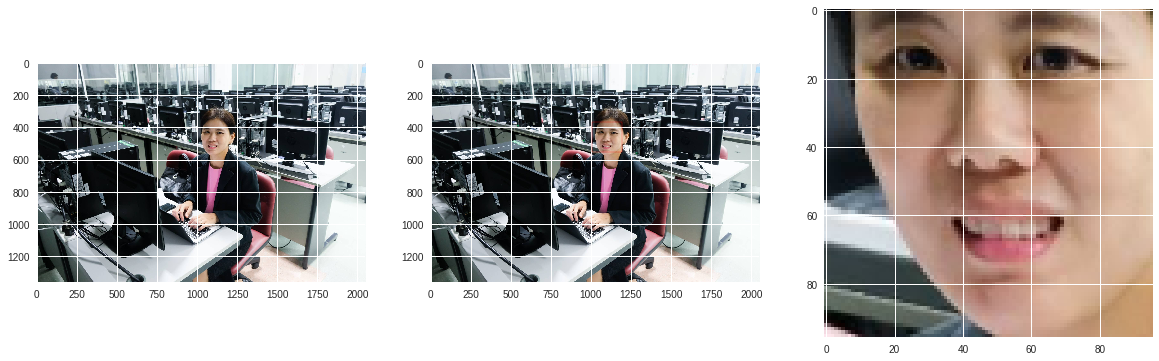

In [0]:
 
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches



from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('/gdrive/My Drive/Colab Notebooks/face_data/shape_predictor_68_face_landmarks.dat')

# Load an image of Jacques Chirac
#jc_orig = load_image(metadata[2].image_path())
jc_orig = load_image("/gdrive/My Drive/Colab Notebooks/face_data/test_img1.jpg")

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.figure(figsize=(20,12))
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
from google.colab import files
files.upload()  ## model.py, utils.py


Saving utils.py to utils.py


{u'utils.py': "# -----------------------------------------------------------------------------------------\n# Code taken from https://github.com/iwantooxxoox/Keras-OpenFace (with minor modifications)\n# -----------------------------------------------------------------------------------------\n\nimport tensorflow as tf\nimport numpy as np\nimport os\n\nfrom numpy import genfromtxt\nfrom keras.layers import Conv2D, ZeroPadding2D, Activation\nfrom keras.layers.normalization import BatchNormalization\n\n_FLOATX = 'float32'\n\ndef variable(value, dtype=_FLOATX, name=None):\n  v = tf.Variable(np.asarray(value, dtype=dtype), name=name)\n  _get_session().run(v.initializer)\n  return v\n\ndef shape(x):\n  return x.get_shape()\n\ndef square(x):\n  return tf.square(x)\n\ndef zeros(shape, dtype=_FLOATX, name=None):\n  return variable(np.zeros(shape), dtype, name)\n\ndef concatenate(tensors, axis=-1):\n  if axis < 0:\n      axis = axis % len(tensors[0].get_shape())\n  return tf.concat(axis, tensors

In [0]:
#from google.colab import files
#files.upload()
from model import create_model

nn4_small2 = create_model()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#%ls /gdrive/My\ Drive/face_data/nn4.small2.v1.h5
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('/gdrive/My Drive/Colab Notebooks/face_data/nn4.small2.v1.h5')

### Create Embedding vectors for face representation

Create meta data for each face

In [0]:
import numpy as np
import os.path
 

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in  tqdm(os.listdir(path)):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':  
                filename = IdentityMetadata(path, i, f)
                #print filename,i
                metadata.append(filename)
    
    return np.array(metadata)
 
# !ls /gdrive/My\ Drive/Colab\ Notebooks/face_data/images
#put your class under images
metadata = load_metadata('/gdrive/My Drive/Colab Notebooks/face_data/images')
 

In [0]:
from model import create_model

# load pretrained model
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('/gdrive/My Drive/Colab Notebooks/face_data/nn4.small2.v1.h5')

In [0]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

As described in the OpenFace [pre-trained models](https://cmusatyalab.github.io/openface/models-and-accuracies/#pre-trained-models) section, landmark indices `OUTER_EYES_AND_NOSE` are required for model nn4.small2.v1. Let's implement face detection, transformation and cropping as `align_image` function for later reuse.

Embedding vectors can   be calculated by feeding the aligned and scaled images into the pre-trained network.

In [0]:
import numpy as np
embedded = np.zeros((metadata.shape[0], 128))

for i, m in tqdm(enumerate(metadata)):
    img = load_image(m.image_path())
    #print m.image_path()
    
    img = align_image(img)
    if img is None:
        continue
    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    # obtain embedding vector for image
    embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

### Compute distance between 2 face embeddings

compute the squared L2 distance between two embbedings.

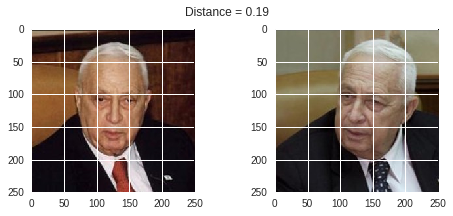

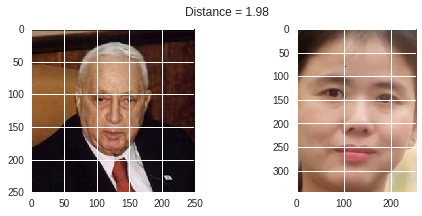

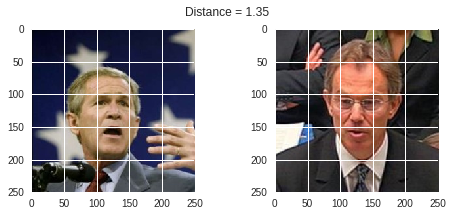

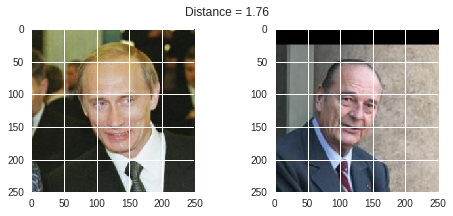

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle('Distance = %.2f'%(distance(embedded[idx1], embedded[idx2])))
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

 
show_pair(2, 3)
show_pair(2, 12)
show_pair(100, 120)
show_pair(130, 112)

The more distances the more possiblity that two images are  different people.

### Find proper distance threshold to  justify two images

To find the optimal value for $\tau$, the face verification performance must be evaluated on a range of distance threshold values. At a given threshold, all possible embedding vector pairs are classified as either *same identity* or *different identity* and compared to the ground truth. Since we're dealing with skewed classes (much more negative pairs than positive pairs), we use the [F1 score](https://en.wikipedia.org/wiki/F1_score) as evaluation metric instead of [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

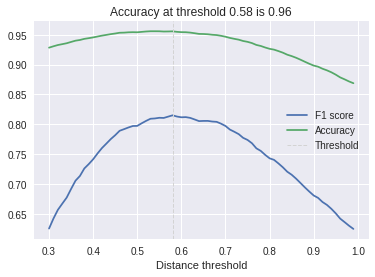

In [0]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        distances.append(distance(embedded[i], embedded[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Accuracy at threshold %.2f is %.2f'%(opt_tau,opt_acc));
plt.xlabel('Distance threshold')
plt.legend();

The face verification accuracy at $\tau$ = 0.56 is 96%. This is not bad given a baseline of 83% for a classifier that always predicts *different identity*   but since nn4.small2.v1 is a relatively small model it is still less than what can be achieved by state-of-the-art models (> 99%). 

The following two histograms show the distance distributions of positive and negative pairs and the location of the decision boundary. There is a clear separation of these distributions which explains the discriminative performance of the network. One can also spot some strong outliers in the positive pairs class but these are not further analyzed here.

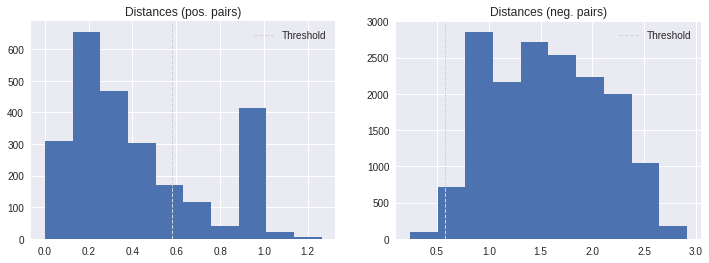

In [0]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

# 2) Face recognition

Given an estimate of the distance threshold $\tau$, face recognition is now as simple as calculating the distances between an input embedding vector and all embedding vectors in a database. The input is assigned the label (i.e. identity) of the database entry with the smallest distance if it is less than $\tau$ or label *unknown* otherwise. This procedure can also scale to large databases as it can be easily parallelized. It also supports one-shot learning, as adding only a single entry of a new identity might be sufficient to recognize new examples of that identity.

A more robust approach is to label the input using the top $k$ scoring entries in the database which is essentially [KNN classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) with a Euclidean distance metric. Alternatively, a linear [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM) can be trained with the database entries and used to classify i.e. identify new inputs. For training these classifiers we use 50% of the dataset, for evaluation the other 50%.

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

print('Compared KNN accuracy = %f , SVM accuracy = %f'%(acc_knn,acc_svc))

Compared KNN accuracy = 0.971429 , SVM accuracy = 0.985714


The KNN classifier achieves an accuracy of 96% on the test set, the SVM classifier 98%. Let's use the SVM classifier to illustrate face recognition on a single example.

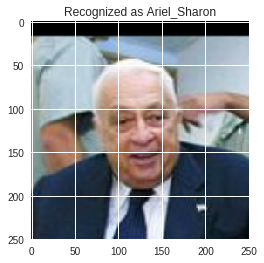

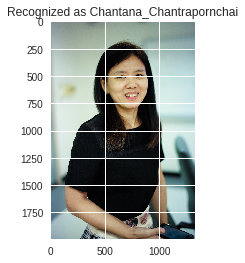

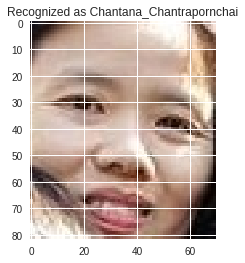

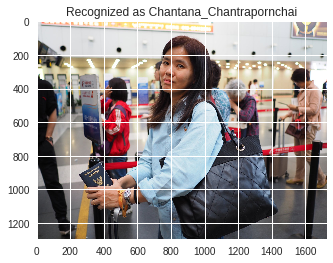

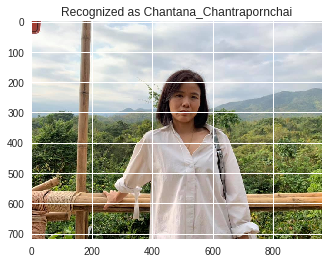

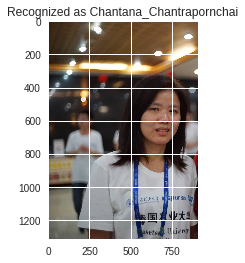

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

 
example_idx = 2

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title('Recognized as %s'%(example_identity));

plt.show()

example_image3 = load_image('/gdrive/My Drive/Colab Notebooks/face_data/test3.jpg')
img = align_image(example_image3)

# scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
dd = np.expand_dims(img, axis=0)
 
nn = nn4_small2_pretrained.predict(dd)
nn =nn.flatten()
example_prediction3 = svc.predict([nn]) 
example_identity3 = encoder.inverse_transform(example_prediction3)[0]

plt.imshow(example_image3)
plt.title('Recognized as %s'%(example_identity3));
plt.show()

 

example_idx = 12

example_image2 = load_image(metadata[test_idx][example_idx].image_path())
example_prediction2 = svc.predict([embedded[test_idx][example_idx]])
example_identity2 = encoder.inverse_transform(example_prediction2)[0]

plt.imshow(example_image2)
plt.title('Recognized as %s'%(example_identity2));
plt.show()



example_image3 = load_image('/gdrive/My Drive/Colab Notebooks/face_data/test2.jpg')
img = align_image(example_image3)

# scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

dd = np.expand_dims(img, axis=0)
 
nn = nn4_small2_pretrained.predict(dd)
nn =nn.flatten()

example_prediction3 = svc.predict([nn])
example_identity3 = encoder.inverse_transform(example_prediction3)[0]

plt.imshow(example_image3)
plt.title('Recognized as %s'%(example_identity3));
plt.show()

example_image3 = load_image('/gdrive/My Drive/Colab Notebooks/face_data/img4.jpg')
img = align_image(example_image3)

# scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

dd = np.expand_dims(img, axis=0)
 
nn = nn4_small2_pretrained.predict(dd)
nn =nn.flatten()

example_prediction3 = svc.predict([nn])
example_identity3 = encoder.inverse_transform(example_prediction3)[0]

plt.imshow(example_image3)
plt.title('Recognized as %s'%(example_identity3));
plt.show()


example_image3 = load_image('/gdrive/My Drive/Colab Notebooks/face_data/img14.jpg')
img = align_image(example_image3)

# scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

dd = np.expand_dims(img, axis=0)
 
nn = nn4_small2_pretrained.predict(dd)
nn =nn.flatten()

example_prediction3 = svc.predict([nn])
example_identity3 = encoder.inverse_transform(example_prediction3)[0]

plt.imshow(example_image3)
plt.title('Recognized as %s'%(example_identity3));
plt.show()

# Dataset visualization

To embed the dataset into 2D space for displaying identity clusters, [t-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-SNE) is applied to the 128-dimensional embedding vectors. Except from a few outliers, identity clusters are well separated.

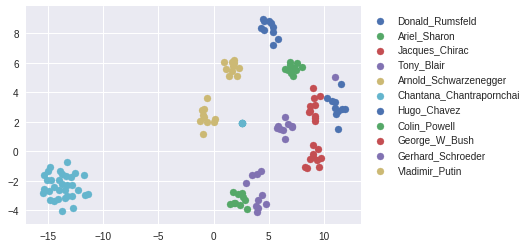

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(embedded)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   
 
plt.legend(bbox_to_anchor=(1, 1));

In [0]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np
from io import StringIO
import PIL

from align import AlignDlib
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

def showarray(a, fmt='jpeg'):
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)

    IPython.display.display(IPython.display.Image(data=f.getvalue()))


cap = cv2.VideoCapture(0)
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

if cap.isOpened(): # try to get the first frame
    is_capturing,  img = cap.read()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    plt.figure(figsize=(12,10))
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

alignment = AlignDlib('/gdrive/My Drive/Colab Notebooks/face_data/shape_predictor_68_face_landmarks.dat')

i = 0
while is_capturing:
    try: 
        start = time.time()
        is_capturing,img = cap.read()


        height , width , layers =  img.shape
        new_w = int(width)
        new_h = int(height)
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.resize(img, (new_w, new_h)) 
        if i% 10 ==0:        
            bb = alignment.getLargestFaceBoundingBox(img)

            if img is None:
                continue
            orig=img
            img = align_image(img)
            if img is None:
                continue
            img = (img / 255.).astype(np.float32)
            dd = np.expand_dims(img, axis=0)
 
            nn = nn4_small2_pretrained.predict(dd)
            nn =nn.flatten()
             
            prediction = svc.predict([nn]) 
            #prediction = svc.predict(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0])
            identity = encoder.inverse_transform(prediction)[0]
            cv2.putText(orig, identity, (bb.left(), bb.top()+bb.height()), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
            cv2.rectangle(orig, (bb.left(), bb.top()), (bb.left()+bb.width(), bb.top()+bb.height()), (255, 0, 0), 2)


        end = time.time()
        seconds = end - start
        fps = round(1 / seconds, 2)
        if i% 10 ==0:   
            cv2.putText(orig, str(fps), (0, int(new_h) - 5), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        img2 = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
        webcam_preview.set_data(img2)
        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        cap.release()
    #showarray(img2)
  
cap.release()
    


In [0]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np
from io import StringIO
import PIL

from align import AlignDlib

def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

def showarray(a, fmt='jpeg'):
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)

    IPython.display.display(IPython.display.Image(data=f.getvalue()))


cap = cv2.VideoCapture('/gdrive/My Drive/Colab Notebooks/face_data/chantana_test.mp4')
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

if cap.isOpened(): # try to get the first frame
    is_capturing,  img = cap.read()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    plt.figure(figsize=(12,10))
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

alignment = AlignDlib('/gdrive/My Drive/Colab Notebooks/face_data/shape_predictor_68_face_landmarks.dat')

i = 0
while is_capturing:
    try: 
        start = time.time()
        is_capturing,img = cap.read()

        if img is None:
            continue
        height , width , layers =  img.shape
        new_w = int(width)
        new_h = int(height)
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.resize(img, (new_w, new_h)) 
        if i% 10 ==0:        
            bb = alignment.getLargestFaceBoundingBox(img)

            if img is None:
                continue
            orig=img
            img = align_image(img)
            if img is None:
                continue
            img = (img / 255.).astype(np.float32)
            dd = np.expand_dims(img, axis=0)
 
            nn = nn4_small2_pretrained.predict(dd)
            nn =nn.flatten()
             
            prediction = svc.predict([nn]) 
             
            identity = encoder.inverse_transform(prediction)[0]
            cv2.putText(orig, identity, (bb.left(), bb.top()+bb.height()), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
            cv2.rectangle(orig, (bb.left(), bb.top()), (bb.left()+bb.width(), bb.top()+bb.height()), (255, 0, 0), 2)


        end = time.time()
        seconds = end - start
        fps = round(1 / seconds, 2)
        if i% 10 ==0:   
            cv2.putText(orig, str(fps), (0, int(new_h) - 5), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        img2 = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
        webcam_preview.set_data(img2)
        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        cap.release()
    #showarray(img2)
  
cap.release()

### References

- [1] [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832)
- [2] [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)